In [1]:
import pandas as pd
import numpy as np
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile  
from io import BytesIO  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score 

In [2]:
#pip install flask
from flask import Flask, request, jsonify, render_template


In [3]:
#load all of the data sets
zip_file_path1 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\20_LTGnoVOLA\BSCR_IM_Position_Report_EUR.csv'
zip_file_path2 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\05_BasenoRM\BSCR_IM_Position_Report_EUR.csv'
zip_file_path3 = r'\\srpzyfap0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.11_SCR_Calculations\CE.11.2.2 - Runs\2024Q1\2024Q1 PROD Run B3-16906\report_16906_2024Q1 PROD Run B3_2e002670-d902-406a-a8be-3d683f63029f.zip'
zip_file_path4 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\30_DNBnoVOLA\BSCR_IM_Position_Report_EUR.csv'
zip_file_path5 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\40_DNBnoTMonSFEQ\report_17014_2024Q1 DNB_PROD_batch_40_DNBnoTMonSFEQ_60529515-05e0-423d-a9fc-1bb150a530ed.zip'
zip_file_path6 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\50_DNBnoUFR\BSCR_IM_Position_Report_EUR.csv'
zip_file_path7 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\52_DNBnoUFR_Liab\report_17016_2024Q1 DNB_PROD_batch_52_DNBnoUFR_Liab_ad2daf3d-773f-4276-88ab-f331d450d0bc.zip'
zip_file_path8 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\55_LTGnoUFR\report_17017_2024Q1 DNB_PROD_batch_55_LTGnoUFR_044131dd-ad9b-4a34-8fc5-2cd933b89ef4.zip'
zip_file_path9 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\56_LTGnoUFR_Full\report_17018_2024Q1 DNB_PROD_batch_56_LTGnoUFR_Full_751de6fa-7caa-4be2-8675-47a45d927b1c.zip'
zip_file_path10 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\57_LTGnoUFR_Liab\report_17019_2024Q1 DNB_PROD_batch_57_LTGnoUFR_Liab_fbdd7441-b05f-46da-b053-f12e0ef36bdb.zip'
zip_file_path11 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\60_DNBnoCRA\BSCR_IM_Position_Report_EUR.csv'
zip_file_path12 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\62_DNBnoCRA_Liab\report_17021_2024Q1 DNB_PROD_batch_62_DNBnoCRA_Liab_740b835d-bd43-45d6-9399-783f50b91eb6.zip'
zip_file_path13 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\65_LTGnoCRA\report_17022_2024Q1 DNB_PROD_batch_65_LTGnoCRA_a6e18f07-9ae7-45a9-8299-a3ee719561d2.zip'
zip_file_path14 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\80_DNBCoC.06\report_17023_2024Q1 DNB_CoC_PROD_80_DNB_CoC 06_e71ac57a-0567-47fa-8fea-d02cc8b0c3c6.zip'
zip_file_path15 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\82_DNBCoC.06_Liab\report_17024_2024Q1 DNB_CoC_PROD_82_DNB_CoC_Liab 06_b4b33551-38ea-4a5b-8210-efd7eef5dd29.zip'
zip_file_path16 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\90_DNBCoC.04\report_17025_2024Q1 DNB_CoC_PROD_90_DNB_CoC 04_486c56bc-31c6-48c3-bc4b-3add822654d6.zip'
zip_file_path17 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.17_DNB_S2_scenarios\2024Q1\05_Runs\92_DNBCoC.04_Liab\report_17026_2024Q1 DNB_CoC_PROD_92_DNB_CoC_Liab 04_d87c0291-1514-4d09-9677-06fdd59bf3c7.zip'
zip_file_path18 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_BASE\report_16967_2024Q1_001.SIIS_BASE_457eb4bd-9ccd-4811-b0f9-e53bd25c5d7e.zip'
zip_file_path19 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_CSCORP50\report_16975_2024Q1_009.SIIS_CSCORP50_d8f59ab4-628a-43e1-9326-292e08c3b460.zip'
zip_file_path20 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_CSCORP50_Combined\report_16977_2024Q1_011.SIIS_CSCORP50_Combined_e8bdbb9d-9cf6-4d4a-a9e3-5f110b24a054.zip'
zip_file_path21 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_CSCORP50_MORTG\report_16976_2024Q1_010.SIIS_CSCORP50_Mortg_3ca69869-23c2-465f-af67-58130becc0cf.zip'
zip_file_path22 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_CSGOV50_AAA\report_16973_2024Q1_007.SIIS_CSGOV50_AAA_56bb179e-81dd-41c5-892f-4699d1c7f287.zip'
zip_file_path23 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_CSGOV50_nonAAA\report_16974_2024Q1_008.SIIS_CSGOV50_nonAAA_9f8c4728-1c08-46c9-a92f-a178bc2523d1.zip'
zip_file_path24 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_EQDOWN25\report_16968_2024Q1_002.SIIS_EQDOWN25_c883ef0e-47de-4b2b-84db-d32fc3f4e7d5.zip'
zip_file_path25 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_IRDOWN50\report_16971_2024Q1_005.SIIS_IRDOWN50_5380257c-75ca-4836-a707-43867f25d853.zip'
zip_file_path26 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_IRSTEEP\report_16972_2024Q1_006.SIIS_IRSTEEP_2e7836f1-9048-41b4-a738-1744a02067f4.zip'
zip_file_path27 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_IRUP50\report_16970_2024Q1_004.SIIS_IRUP50_cf20fb55-05ef-4396-8b41-73c43943f695.zip'
zip_file_path28 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.15_Ratio_Sensitivities\2024Q1\Runs\SIIS_REDOWN10\report_16969_2024Q1_003.SIIS_REDOWN10_448b9fcd-97d1-4d6b-ab77-7e457e0edb49.zip'

#Quarter 2 runs
zip_file_path29 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.11_SCR_Calculations\CE.11.2.2 - Runs\2024Q2\2024Q2 PROD Run C2.1-17364\report_17364_2024Q2 PROD Run C2.1_f6ac5c6f-c9a5-40e0-a2d5-fbb19de94fe4.zip'


# Specify the name of the file inside the zip file that you want to open 

#convert to a pandas dataframe
df1 = pd.read_csv(zip_file_path1)
df4 = pd.read_csv(zip_file_path4)
df6 = pd.read_csv(zip_file_path6)
df11 = pd.read_csv(zip_file_path11)

file_name_inside_zip2 = 'BSCR_IM_Position_Report_EUR.csv' 
file_name_inside_zip3 = 'BSCR_IM_Position_Report_EUR.csv' 
file_name_inside_zip5 = 'BSCR_IM_Position_Report_EUR.csv'
file_name_inside_zip7 = 'BSCR_IM_Position_Report_EUR.csv'

with zipfile.ZipFile(zip_file_path2, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip2)
    df2 = pd.read_csv(file_name_inside_zip2)

with zipfile.ZipFile(zip_file_path3, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip3)
    df3 = pd.read_csv(file_name_inside_zip3)

with zipfile.ZipFile(zip_file_path5, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip5)
    df5 = pd.read_csv(file_name_inside_zip5)

with zipfile.ZipFile(zip_file_path7, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df7 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path8, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df8 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path9, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df9 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path10, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df10 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path12, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df12 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path13, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df13 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path14, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df14 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path15, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df15 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path16, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df16 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path17, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df17 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path18, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df18 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path19, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df19 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path20, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df20 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path21, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df21 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path22, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df22 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path23, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df23 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path24, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df24 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path25, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df25 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path26, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df26 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path27, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df27 = pd.read_csv(file_name_inside_zip7)

with zipfile.ZipFile(zip_file_path28, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df28 = pd.read_csv(file_name_inside_zip7)

#Quarter 2

with zipfile.ZipFile(zip_file_path29, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip7)
    df29 = pd.read_csv(file_name_inside_zip7)


#merge the dataframes of Q1
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28])
df['Quarter'] = 1

#merge the dataframes of Q2
df2 = pd.concat([df29])
df2['Quarter'] = 2

#merge the dataframes of Q1 and Q2
df = pd.concat([df, df2])

#save the data to a csv file
df.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\Final_DataBase.csv')

C:\Users\M67C263\AppData\Local\Temp\ipykernel_27592\3829629422.py:38: DtypeWarning: Columns (12,13,16,26,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(zip_file_path1)
C:\Users\M67C263\AppData\Local\Temp\ipykernel_27592\3829629422.py:39: DtypeWarning: Columns (12,13,16,26,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(zip_file_path4)
C:\Users\M67C263\AppData\Local\Temp\ipykernel_27592\3829629422.py:40: DtypeWarning: Columns (12,13,16,26,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv(zip_file_path6)
C:\Users\M67C263\AppData\Local\Temp\ipykernel_27592\3829629422.py:41: DtypeWarning: Columns (12,13,16,26,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df11 = pd.read_csv(zip_file_path11)


BadZipFile: File is not a zip file

In [5]:
#Quarterly Production Run IM Positions - Data

zip_file_path1 = r'\\srpzyfap0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.11_SCR_Calculations\CE.11.2.2 - Runs\2024Q1\2024Q1 PROD Run B3-16906\report_16906_2024Q1 PROD Run B3_2e002670-d902-406a-a8be-3d683f63029f.zip'
zip_file_path2 = r'\\SRPZYFAP0003.insim.biz\ERM\2024_Reporting\I_RFCF\P.11_SCR_Calculations\CE.11.2.2 - Runs\2024Q2\2024Q2 PROD Run C2.1-17364\report_17364_2024Q2 PROD Run C2.1_f6ac5c6f-c9a5-40e0-a2d5-fbb19de94fe4.zip'
file_name_inside_zip3 = 'BSCR_IM_Position_Report_EUR.csv'

with zipfile.ZipFile(zip_file_path1, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip3)
    df1 = pd.read_csv(file_name_inside_zip3)

with zipfile.ZipFile(zip_file_path2, 'r') as zip_file:
    zip_file.extract(file_name_inside_zip3)
    df2 = pd.read_csv(file_name_inside_zip3)

#add a column 'Quarter' to the dataframe to identify the quarter
df1['Quarter'] = 1
df2['Quarter'] = 2

#merge the dataframes
df = pd.concat([df1, df2])

df.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\df3.csv')

C:\Users\M67C263\AppData\Local\Temp\ipykernel_39592\267236410.py:9: DtypeWarning: Columns (7,8,9,10,11,12,13,14,16,17,26,27,28,29,31,32,33,34,35,36,37,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_name_inside_zip3)
C:\Users\M67C263\AppData\Local\Temp\ipykernel_39592\267236410.py:13: DtypeWarning: Columns (7,8,9,10,11,12,13,14,16,17,26,27,28,29,31,32,33,34,35,36,37,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file_name_inside_zip3)


In [4]:
#load the Training Database which was created and saved to the Desktop
df = pd.read_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\Final_DataBase.csv')

#filter the Training Database for certain columns and rows here for the Real Estate Training
df = df[["IM RiskFactor", "Capital View", "DIVISION", "BL", "BU", "Zoom Level", "Percentile", "FLECS Instrument Type", "Asset Liability Type", "Real Estate SCR", "Real Estate ValueAfter", "Real Estate ValueBefore", "Quarter"]]
df = df[(df['Capital View'] == 'IM') & (df['DIVISION'] == 'IM Entities') & (df['Percentile'] == 0.995)  & (df['Zoom Level'] == 'POSITION') & (df['BL'] != 'Czech Republic')]
df['Risk Factor'] = np.where(pd.isnull(df['IM RiskFactor']), df['FLECS Instrument Type'], df['IM RiskFactor'])


C:\Users\M67C263\AppData\Local\Temp\ipykernel_25832\65445921.py:2: DtypeWarning: Columns (8,9,10,11,12,13,14,15,17,18,27,28,29,30,32,33,34,35,36,37,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\Final_DataBase.csv')


In [5]:
#FILTERING OF THE TRAINING DATABASE

#drop columns where Risk Factor is not: CompositeForward, CompositeOption, MutualFund, RE_NETHERLANDS, RE_BELGIUM, RE_FRANCE, RE_ITALY, RE_SPAIN, RE_GERMANY, RE_NORDICS, RE_CEE
df = df[(df['Risk Factor'] == 'CompositeForward') | (df['Risk Factor'] == 'RealEstate') |(df['Risk Factor'] == 'CompositeOption') 
| (df['Risk Factor'] == 'MutualFund') | (df['Risk Factor'] == 'RE_NETHERLANDS') | (df['Risk Factor'] == 'RE_BELGIUM') | 
(df['Risk Factor'] == 'RE_FRANCE') | (df['Risk Factor'] == 'RE_ITALY') | (df['Risk Factor'] == 'RE_SPAIN') | (df['Risk Factor'] == 'RE_GERMANY') | 
(df['Risk Factor'] == 'RE_NORDICS') | (df['Risk Factor'] == 'RE_CEE')]

#add a new column Risk_Factor_new which is 1 for CompositeForward, 2 for CompositeOption, 3 for MutualFund, 4 for RE_NETHERLANDS, 5 for RE_BELGIUM, 6 for RE_FRANCE, 7 for RE_ITALY, 8 for RE_SPAIN, 9 for RE_GERMANY, 10 for RE_NORDICS, 11 for RE_CEE
df['Risk_Factor_new'] = np.where(df['Risk Factor'] == 'CompositeForward', 1, np.where(df['Risk Factor'] == 'CompositeOption', 2, np.where(df['Risk Factor'] == 'MutualFund', 
3, np.where(df['Risk Factor'] == 'RE_NETHERLANDS', 4, np.where(df['Risk Factor'] == 'RE_BELGIUM', 5, np.where(df['Risk Factor'] == 'RE_FRANCE', 6, np.where(df['Risk Factor'] 
== 'RE_ITALY', 7, np.where(df['Risk Factor'] == 'RE_SPAIN', 8, np.where(df['Risk Factor'] == 'RE_GERMANY', 9, np.where(df['Risk Factor'] == 'RE_NORDICS', 10, 11))))))))))

#add a new column BL_new which is 1 for NN Leven, 2 for NN Schade, 3 for NN Re NL
df['BL_new'] = np.where(df['BL'] == 'NN Leven', 1, np.where(df['BL'] == 'NN Schade', 2, 3))

#only keep the rows where RealEstate Value Before is not null or empty
df = df[(df['Real Estate ValueBefore'].notnull()) & (df['Real Estate ValueBefore'] != 0)]

#add a column Type which is 0 for Asset Liability Type 'Total', 1 for 'Assets' and 2 for 'Liabilities'
df['Type'] = np.where(df['Asset Liability Type'] == 'Total', 0, np.where(df['Asset Liability Type'] == 'Assets', 1, 2))

df = df.drop(columns=['IM RiskFactor', 'FLECS Instrument Type', 'Percentile', 'Capital View', 'DIVISION', 'Zoom Level', 'BU', 'Asset Liability Type']) #'Risk Factor', 'BL'

df['Real Estate SCR' ] = pd.to_numeric(df['Real Estate SCR'], errors='coerce')
df['Real Estate ValueAfter' ] = pd.to_numeric(df['Real Estate ValueAfter'], errors='coerce')
df['Real Estate ValueBefore' ] = pd.to_numeric(df['Real Estate ValueBefore'], errors='coerce')

df['SCR Difference'] = df['Real Estate ValueBefore'] - df['Real Estate ValueAfter']

relevant_data = df[['BL_new', 'Risk_Factor_new', 'Real Estate SCR']]
relevant_data_encoding = pd.get_dummies(relevant_data, columns=['BL_new', 'Risk_Factor_new'])
correlation_matrix = relevant_data_encoding.corr()
scr_correlation = correlation_matrix['Real Estate SCR']
print(correlation_matrix)

#add a new column to the dataframe with the correlation
correlation_dic = {}
for bl in df['BL_new'].unique():
    for risk_factor in df['Risk_Factor_new'].unique():
        bl_col = f'BL_{bl}'
        rf_col = f'Risk Factor_{risk_factor}'
        if bl_col in correlation_matrix.index and rf_col in correlation_matrix.columns:
            correlation_dic[(bl, risk_factor)] = correlation_matrix.loc[bl_col, rf_col]
        else:
            correlation_dic[(bl, risk_factor)] = 0 

df['Correlation'] = df.apply(lambda row: correlation_dic[(row['BL_new'], row['Risk_Factor_new'])], axis=1)

#new database with only the relevant columns is now created
df_test_training = df 
df_Corr_training = correlation_matrix

df_test_training.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\df_test_training.csv')
df_Corr_training.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\df_Corr_training.csv')


                    Real Estate SCR  BL_new_1  BL_new_2  BL_new_3  \
Real Estate SCR            1.000000  0.131618 -0.038408 -0.114335   
BL_new_1                   0.131618  1.000000 -0.472699 -0.727957   
BL_new_2                  -0.038408 -0.472699  1.000000 -0.260083   
BL_new_3                  -0.114335 -0.727957 -0.260083  1.000000   
Risk_Factor_new_1         -0.091013  0.394884 -0.186661 -0.287458   
Risk_Factor_new_2         -0.110890  0.481355 -0.227536 -0.350406   
Risk_Factor_new_3          0.228158 -0.405073  0.188362  0.297300   
Risk_Factor_new_4         -0.024724 -0.074276  0.044833  0.046505   
Risk_Factor_new_5         -0.036725 -0.143998  0.066968  0.105680   
Risk_Factor_new_6         -0.032991 -0.208911  0.097156  0.153320   
Risk_Factor_new_7          0.008758 -0.087132  0.040522  0.063946   
Risk_Factor_new_8          0.029870 -0.071866  0.033422  0.052743   
Risk_Factor_new_9         -0.011869 -0.124362  0.057836  0.091269   
Risk_Factor_new_10        -0.00666

In [6]:
#calculte the number of degrees of freedom
n = len(df)
k = len(df.columns) - 1
dof = n - k - 1
print (dof)

#rule of thumb = the dataset of the training should be 10x the number of degrees of freedom

12724


                      Model           MSE       R^2           MAE
0             Random Forest  5.082919e+12  0.998274  2.343108e+05
1         Linear Regression  1.736086e+13  0.994104  1.171818e+06
2             Decision Tree  3.683896e+12  0.998749  1.898586e+05
3  Support Vector Regressor  3.066287e+15 -0.041379  1.155110e+07
4         Gradient Boosting  8.800957e+12  0.997011  5.701994e+05


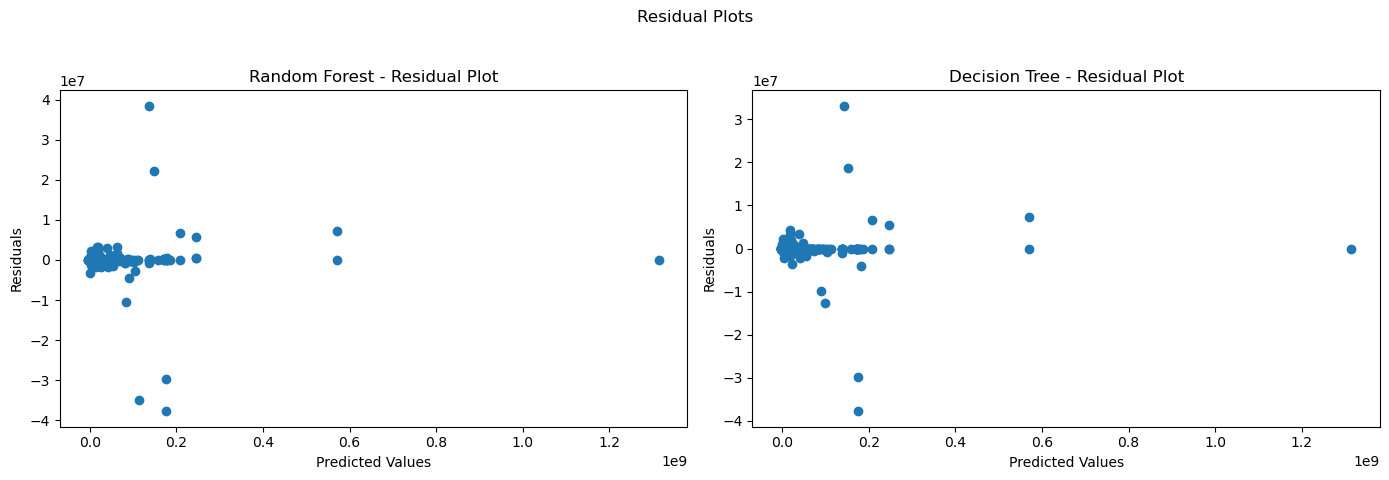

In [9]:
df = df.dropna()

#TRAINING

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Define characteristics x and target y
X = df.drop(columns=['Real Estate ValueAfter', 'Real Estate SCR', 'SCR Difference', 'BL', 'Risk Factor', 'Quarter'])
Y = df['Real Estate ValueAfter']

#training and testing here: 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define a function to train and evaluate a model
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, r2, mae, y_pred

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models and store results
results = []
residuals_dict = {}
predictions_dict = {}
for name, model in models.items():
    mse, r2, mae, y_pred = evaluate_model(model)
    results.append({'Model': name, 'MSE': mse, 'R^2': r2, 'MAE': mae})
    residuals_dict[name] = y_test - y_pred
    predictions_dict[name] = y_pred

# Create a DataFrame for the results
cross_check = pd.DataFrame(results)

# Display the cross check table
print(cross_check)
cross_check.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\cross_check.csv')

# Plot residuals for Random Forest and Decision Tree in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Residual Plots')

model_names = ['Random Forest', 'Decision Tree']
for i in range(2):
    ax = axs[i]
    ax.scatter(predictions_dict[model_names[i]], residuals_dict[model_names[i]])
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title(f'{model_names[i]} - Residual Plot')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

            Actual     Predicted
0     2.873495e+06  2.553267e+06
1     3.284202e+05  3.279264e+05
2     2.023906e+05  1.935685e+05
3    -1.166560e+06 -1.169570e+06
4     1.646570e+05  1.632698e+05
...            ...           ...
2542  1.837702e+07  1.829321e+07
2543  1.780686e+07  1.762766e+07
2544  8.905215e+06  8.825486e+06
2545 -3.601911e+04 -3.557497e+04
2546 -2.990844e+05 -2.991118e+05

[2547 rows x 2 columns]


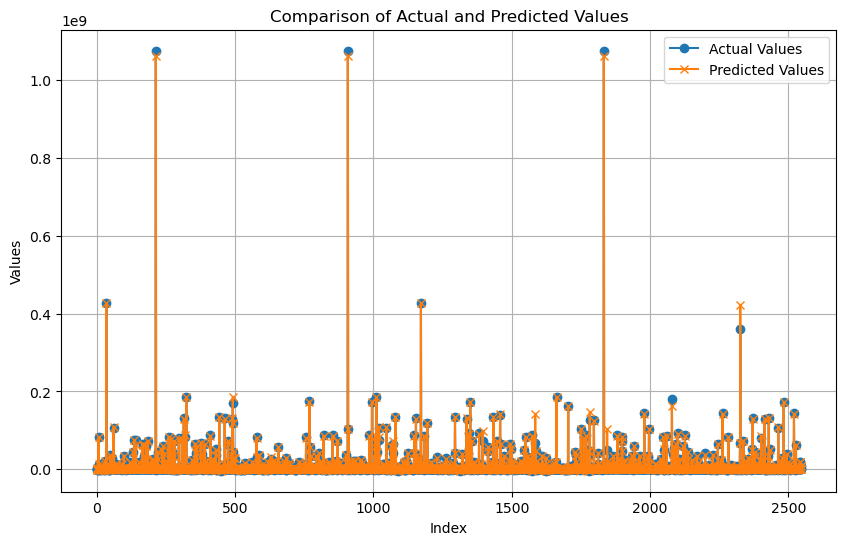

Mean Squared Error: 5975639630964.851
R2 Score: 0.9969874278593185
Mean Absolute Error: 224098.37485747924


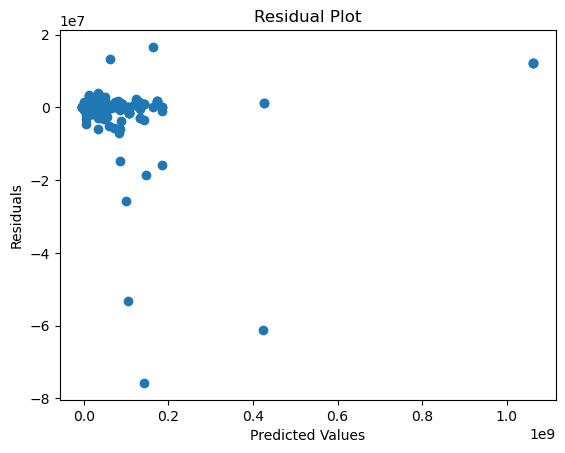

In [7]:
df = df.dropna()

#TRAINING

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Define characteristics x and target y
X = df.drop(columns=['Real Estate ValueAfter', 'Real Estate SCR', 'SCR Difference', 'BL', 'Risk Factor', 'Quarter'])
Y = df['Real Estate ValueAfter']

#training and testing here: 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#specifiy the model algorithm here: Random Forest with 100 trees
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert y_test to a DataFrame
y_test_df = pd.DataFrame({'Actual': y_test})

# Create a DataFrame for the predictions
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted'])

# Combine y_test and y_pred into a single DataFrame for comparison
comparison_df = pd.concat([y_test_df.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)
comparison_df.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\comparison_df.csv')

# Display the comparison DataFrame
print(comparison_df)

# Plot y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual Values', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

#calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

#residual plots
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [8]:
#FILTERING OF THE QUARTERLY PRODUCTION DATABASE (same filtering as the training database as the format needs to be the same)
df3 = pd.read_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\df3.csv')

df3 = df3[["IM RiskFactor", "Capital View", "DIVISION", "BL", "BU", "Zoom Level", "Percentile", "FLECS Instrument Type", "Asset Liability Type", "Real Estate SCR", "Real Estate ValueAfter", "Real Estate ValueBefore", "Quarter"]]
df3 = df3[(df3['Capital View'] == 'IM') & (df3['DIVISION'] == 'IM Entities') & (df3['Percentile'] == 0.995)  & (df3['Zoom Level'] == 'POSITION') & (df3['BL'] != 'Czech Republic')]
df3['Risk Factor'] = np.where(pd.isnull(df3['IM RiskFactor']), df3['FLECS Instrument Type'], df3['IM RiskFactor'])

#drop columns where Risk Factor is not: CompositeForward, CompositeOption, MutualFund, RE_NETHERLANDS, RE_BELGIUM, RE_FRANCE, RE_ITALY, RE_SPAIN, RE_GERMANY, RE_NORDICS, RE_CEE
df3 = df3[(df3['Risk Factor'] == 'CompositeForward') | (df3['Risk Factor'] == 'RealEstate') |(df3['Risk Factor'] == 'CompositeOption') 
| (df3['Risk Factor'] == 'MutualFund') | (df3['Risk Factor'] == 'RE_NETHERLANDS') | (df3['Risk Factor'] == 'RE_BELGIUM') | 
(df3['Risk Factor'] == 'RE_FRANCE') | (df3['Risk Factor'] == 'RE_ITALY') | (df3['Risk Factor'] == 'RE_SPAIN') | (df3['Risk Factor'] == 'RE_GERMANY') | 
(df3['Risk Factor'] == 'RE_NORDICS') | (df3['Risk Factor'] == 'RE_CEE')]

#add a new column Risk_Factor_new which is 1 for CompositeForward, 2 for CompositeOption, 3 for MutualFund, 4 for RE_NETHERLANDS, 5 for RE_BELGIUM, 6 for RE_FRANCE, 7 for RE_ITALY, 8 for RE_SPAIN, 9 for RE_GERMANY, 10 for RE_NORDICS, 11 for RE_CEE
df3['Risk_Factor_new'] = np.where(df3['Risk Factor'] == 'CompositeForward', 1, np.where(df3['Risk Factor'] == 'CompositeOption', 2, np.where(df3['Risk Factor'] == 'MutualFund', 
3, np.where(df3['Risk Factor'] == 'RE_NETHERLANDS', 4, np.where(df3['Risk Factor'] == 'RE_BELGIUM', 5, np.where(df3['Risk Factor'] == 'RE_FRANCE', 6, np.where(df3['Risk Factor'] 
== 'RE_ITALY', 7, np.where(df3['Risk Factor'] == 'RE_SPAIN', 8, np.where(df3['Risk Factor'] == 'RE_GERMANY', 9, np.where(df3['Risk Factor'] == 'RE_NORDICS', 10, 11))))))))))

#add a new column BL_new which is 1 for NN Leven, 2 for NN Schade, 3 for NN Re NL
df3['BL_new'] = np.where(df3['BL'] == 'NN Leven', 1, np.where(df3['BL'] == 'NN Schade', 2, 3))

#only keep the rows where RealEstate Value Before is not null or empty
df3 = df3[(df3['Real Estate ValueBefore'].notnull()) & (df3['Real Estate ValueBefore'] != 0)]

#add a column Type which is 0 for Asset Liability Type 'Total', 1 for 'Assets' and 2 for 'Liabilities'
df3['Type'] = np.where(df3['Asset Liability Type'] == 'Total', 0, np.where(df3['Asset Liability Type'] == 'Assets', 1, 2))

df3 = df3.drop(columns=['IM RiskFactor', 'FLECS Instrument Type', 'Percentile', 'Capital View', 'DIVISION', 'Zoom Level', 'BU', 'Asset Liability Type']) #'Risk Factor', 'BL'

df3['Real Estate SCR' ] = pd.to_numeric(df3['Real Estate SCR'], errors='coerce')
df3['Real Estate ValueAfter' ] = pd.to_numeric(df3['Real Estate ValueAfter'], errors='coerce')
df3['Real Estate ValueBefore' ] = pd.to_numeric(df3['Real Estate ValueBefore'], errors='coerce')

df3['SCR Difference'] = df3['Real Estate ValueBefore'] - df3['Real Estate ValueAfter']

relevant_data = df3[['BL_new', 'Risk_Factor_new', 'Real Estate SCR']]
relevant_data_encoding = pd.get_dummies(relevant_data, columns=['BL_new', 'Risk_Factor_new'])
correlation_matrix = relevant_data_encoding.corr()
scr_correlation = correlation_matrix['Real Estate SCR']
#print(correlation_matrix)

#add a new column to the dataframe with the correlation
correlation_dic = {}
for bl in df3['BL_new'].unique():
    for risk_factor in df3['Risk_Factor_new'].unique():
        bl_col = f'BL_{bl}'
        rf_col = f'Risk Factor_{risk_factor}'
        if bl_col in correlation_matrix.index and rf_col in correlation_matrix.columns:
            correlation_dic[(bl, risk_factor)] = correlation_matrix.loc[bl_col, rf_col]
        else:
            correlation_dic[(bl, risk_factor)] = 0 

df3['Correlation'] = df3.apply(lambda row: correlation_dic[(row['BL_new'], row['Risk_Factor_new'])], axis=1)

df2 = df3
df2_original = df3.copy()

print(df2.head())

#save to csv
df2_test = df2 
df2_Corr = correlation_matrix

df2_original.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\df2_original.csv')
df2_test.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\df2_test.csv')
df2_Corr.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\df2_Corr.csv')


C:\Users\M67C263\AppData\Local\Temp\ipykernel_25832\1889354821.py:2: DtypeWarning: Columns (8,9,10,11,12,13,14,15,17,18,27,28,29,30,32,33,34,35,36,37,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\df3.csv')


              BL  Real Estate SCR  Real Estate ValueAfter  \
177507  NN Leven              0.0            -5488.668333   
177510  NN Leven              0.0            -5063.288969   
177513  NN Leven              0.0            -1012.255168   
177516  NN Leven              0.0           -14266.971885   
177519  NN Leven              0.0           -17268.261135   

        Real Estate ValueBefore  Quarter       Risk Factor  Risk_Factor_new  \
177507             -5488.668333        1  CompositeForward                1   
177510             -5063.288969        1  CompositeForward                1   
177513             -1012.255168        1  CompositeForward                1   
177516            -14266.971885        1  CompositeForward                1   
177519            -17268.261135        1  CompositeForward                1   

        BL_new  Type  SCR Difference  Correlation  
177507       1     2             0.0            0  
177510       1     2             0.0            0  
17

In [11]:
df2_original = pd.read_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\df2_original.csv')


In [ ]:
# Define the changes function  
def changes(risk_factor, bl, value, quarter):
    Z = df2_original
    count = 0
    # Count the number of rows where the BL is bl and the Risk Factor is risk_factor
    for index, row in Z.iterrows():
        if row['BL'] == bl and row['Risk Factor'] == risk_factor: #and row['Quarter'] == quarter:
            count += 1
    Z.loc[(Z['BL'] == bl) & (Z['Risk Factor'] == risk_factor) & (Z['Quarter'] == quarter), 'Real Estate ValueBefore'] += (value/count)
    Z = Z.drop(columns=['Real Estate ValueAfter', 'Real Estate SCR', 'SCR Difference', 'BL', 'Risk Factor', 'Quarter', 'Unnamed: 0'])
    Z['new predict'] = model.predict(Z)

    # Create a new column with the difference between the new prediction and the Real Estate Value After but is 0 if the difference is negative
    Z['new SCR'] = np.where(Z['Real Estate ValueBefore'] - Z['new predict'] > 0, Z['Real Estate ValueBefore'] - Z['new predict'], 0)
    Z.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\Z.csv')

    df2_original['new SCR'] = Z['new SCR']
    df2_original['new predict'] = Z['new predict']
    aggregated_prediction = df2_original.groupby(['BL_new', 'Risk_Factor_new', 'Quarter'])['Real Estate SCR'].sum().reset_index()  # Original quarterly production database
    aggregated_prediction.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\aggregated_prediction.csv')
    aggregated_prediction_after = df2_original.groupby(['BL_new', 'Risk_Factor_new', 'Quarter'])['new SCR'].sum().reset_index()  # Predicted quarterly production database
    aggregated_prediction_after.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\aggregated_prediction_after.csv')
    
    total_scr_before = df2_original.groupby(['Quarter'])['Real Estate SCR'].sum()  # Original quarterly production database
    total_scr_after = df2_original.groupby(['Quarter'])['new SCR'].sum()
    
    Total_SCR = pd.concat([total_scr_before, total_scr_after], axis=1).reset_index()
    Total_SCR['Quarter'] = df2_original['Quarter'].unique()
    Total_SCR.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\Total_SCR.csv')
    
    return total_scr_before, total_scr_after

# Call the function
y_predd = changes('RE_NETHERLANDS', 'NN Schade', 10, 2)

# Display the updated DataFrame
print(y_predd)


(Quarter
1    1.819722e+09
2    1.785285e+09
Name: Real Estate SCR, dtype: float64, Quarter
1    1.729155e+09
2    1.834347e+09
Name: new SCR, dtype: float64)


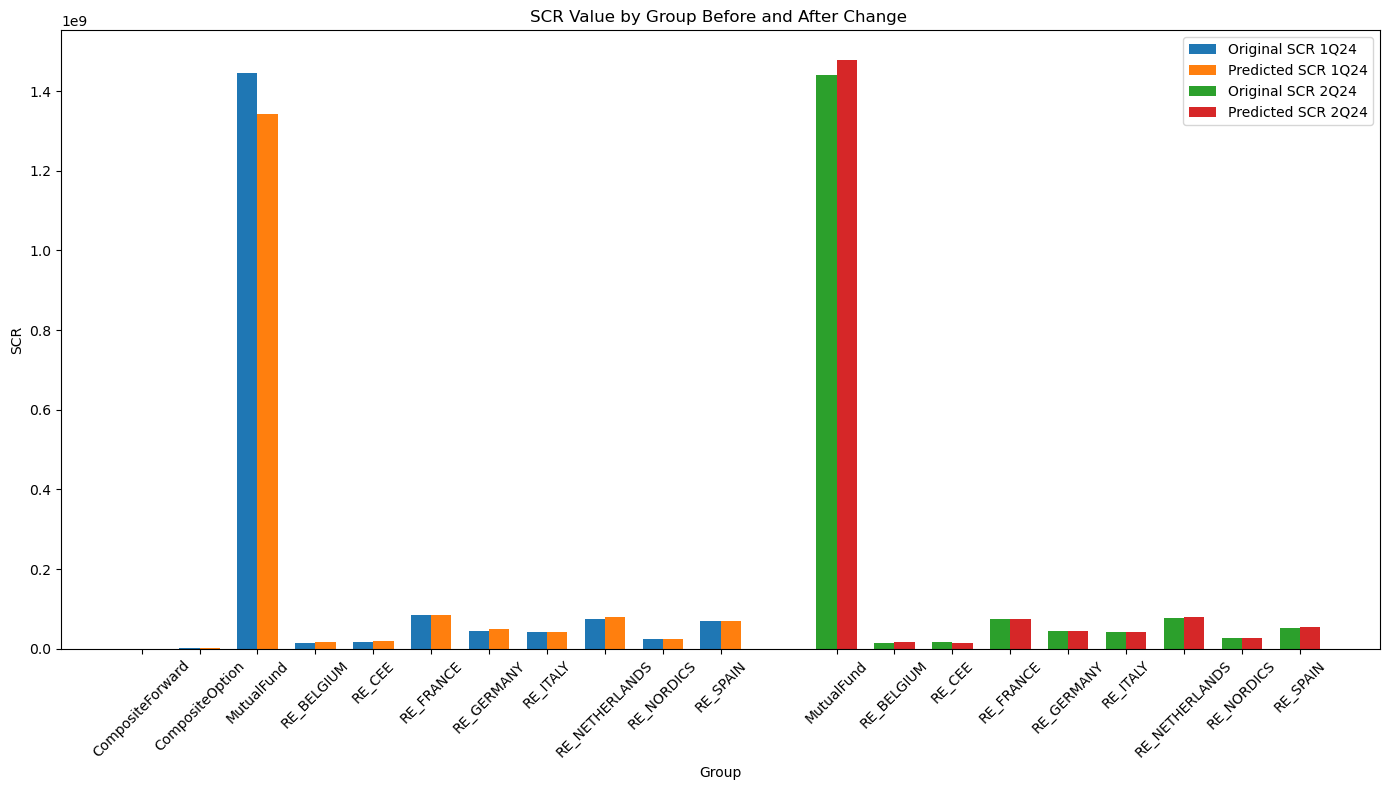

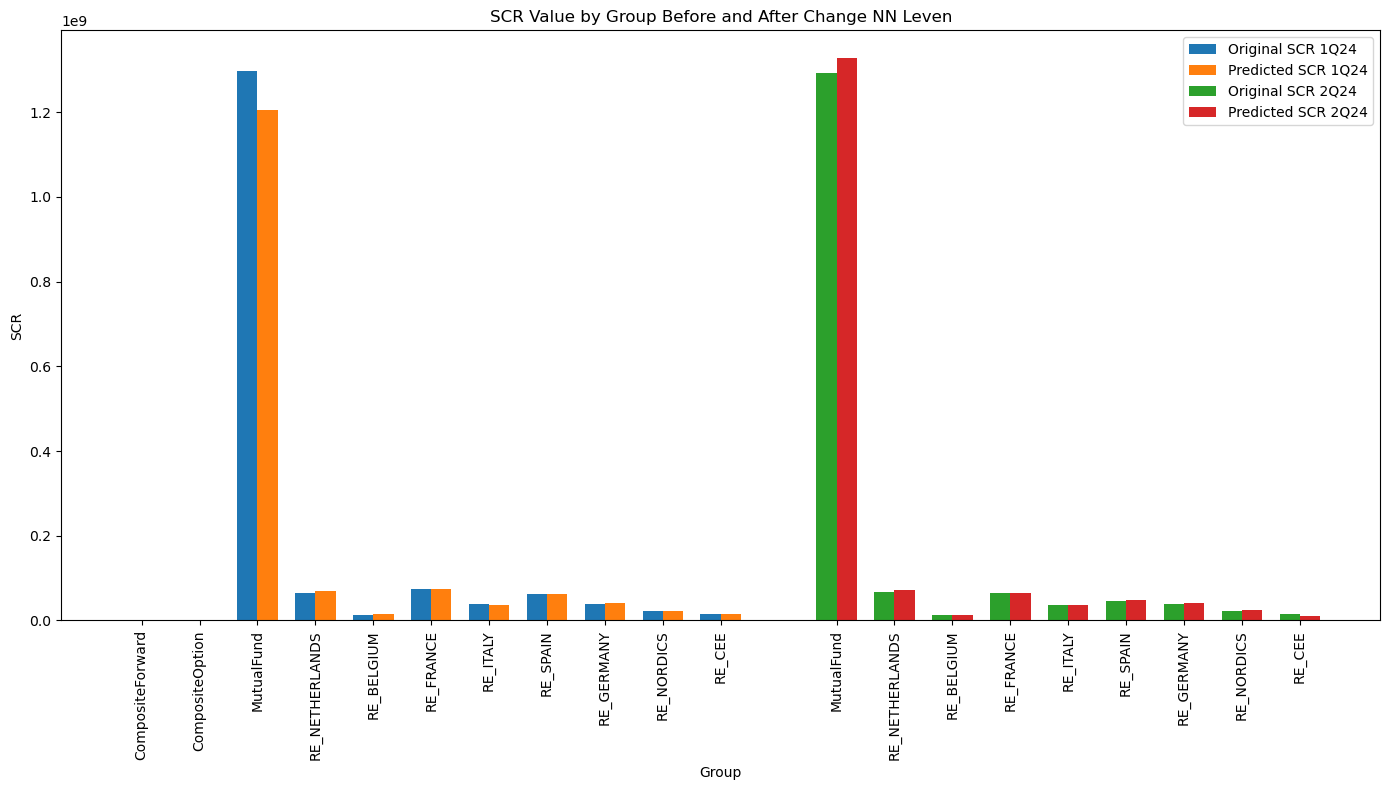

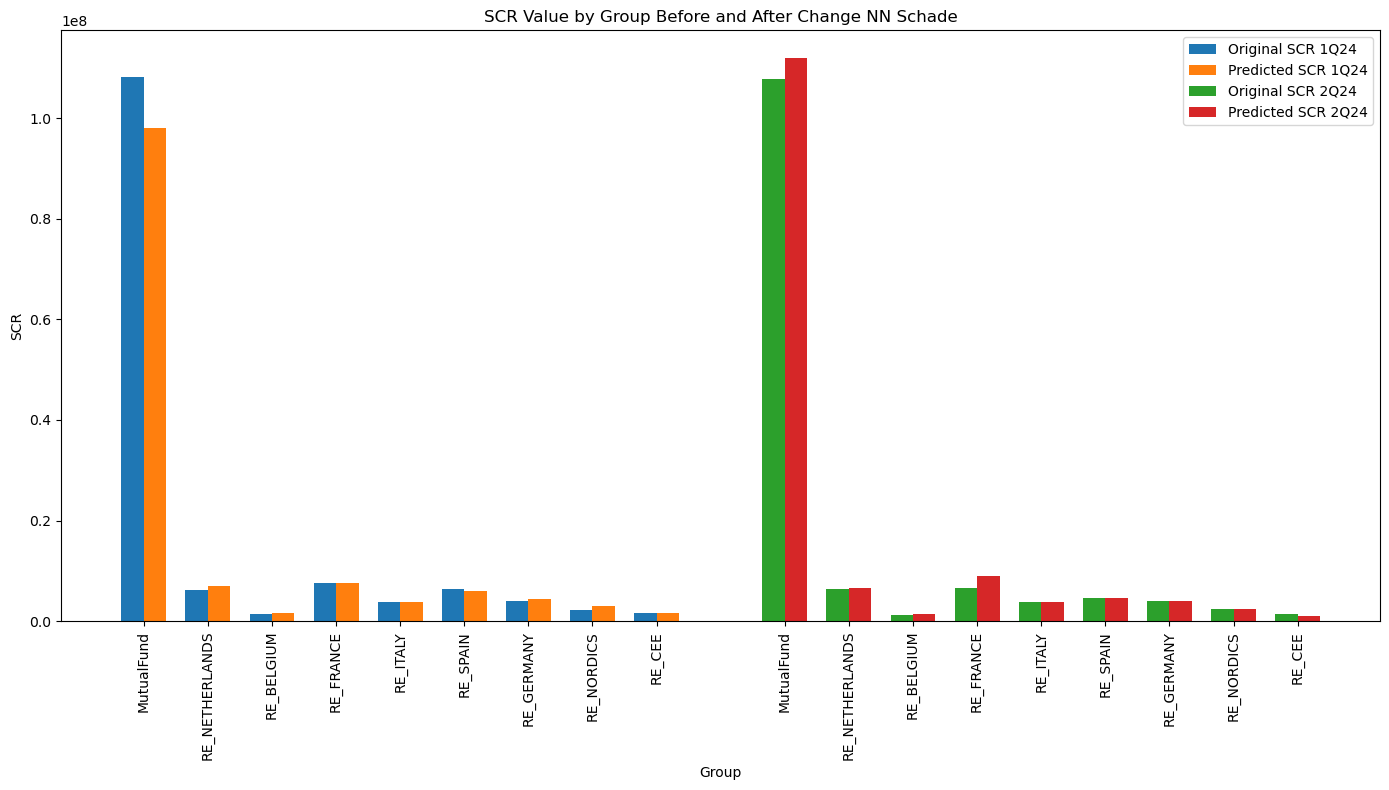

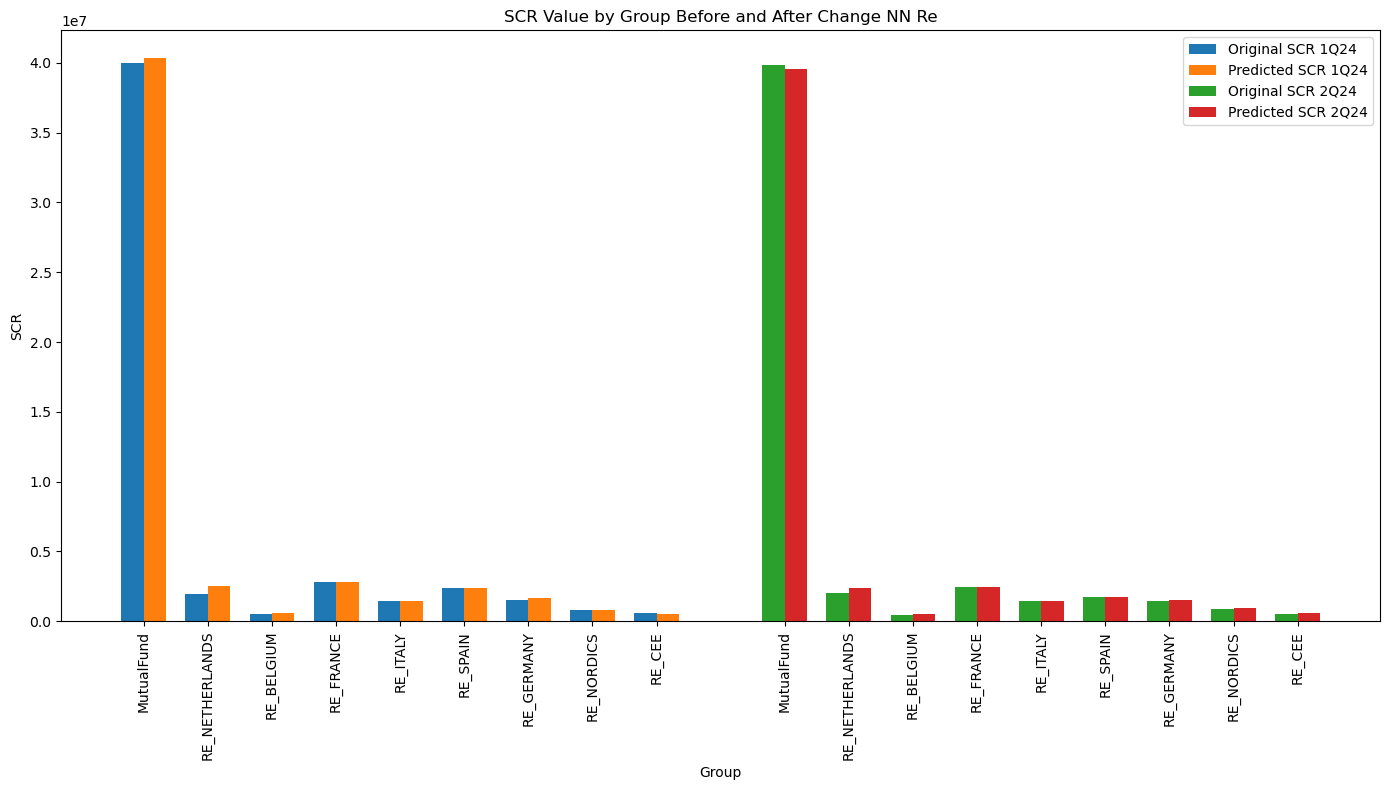

In [13]:
#PLOT THE RESULTS
aggregated_prediction = pd.read_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\aggregated_prediction.csv')
aggregated_prediction_after = pd.read_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\aggregated_prediction_after.csv')

merged_prediction = pd.merge(aggregated_prediction, aggregated_prediction_after, on=['Quarter','BL_new', 'Risk_Factor_new'])
# merged_prediction.columns = ['BL_new', 'Risk_Factor_new', 'Real Estate SCR', 'new SCR']
merged_prediction = merged_prediction.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
merged_prediction = merged_prediction.sort_values(by=['Quarter', 'BL_new'])
merged_prediction.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\merged_prediction.csv')

result_prediction = merged_prediction

# Define the mapping from numerical to string values
mapping_BL = {1: 'NN Leven', 2: 'NN Schade', 3: 'NN Re'}
mapping_RF = {1: 'CompositeForward', 2: 'CompositeOption', 3: 'MutualFund', 4: 'RE_NETHERLANDS', 5: 'RE_BELGIUM', 6: 'RE_FRANCE', 7: 'RE_ITALY', 8: 'RE_SPAIN', 9: 'RE_GERMANY', 10: 'RE_NORDICS', 11: 'RE_CEE'}
mapping_Q = {1: '1Q24', 2: '2Q24'}

# Apply the mapping to the BL_new column
result_prediction['BL_new'] = result_prediction['BL_new'].map(mapping_BL)
result_prediction['Risk_Factor_new'] = result_prediction['Risk_Factor_new'].map(mapping_RF)
result_prediction['Quarter'] = result_prediction['Quarter'].map(mapping_Q)

result_prediction.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\result_prediction.csv')

result_Actual = result_prediction.groupby(['Risk_Factor_new', 'Quarter'])['Real Estate SCR'].sum()  # Original quarterly production database
result_Pred = result_prediction.groupby(['Risk_Factor_new', 'Quarter'])['new SCR'].sum()  # Original quarterly production database
Total_result = pd.concat([result_Actual, result_Pred], axis=1).reset_index()
Total_result = Total_result.sort_values(by=['Quarter', 'Risk_Factor_new'])

Total_result.to_csv(r'\\srpzyfap0003.insim.biz\ESGShare\GRP\FLECS_share\User Folders\Yiming Liang\SCR Prediction Tool\SCR Prediction_YM\Total_result.csv')
  
# Plot the data Group
    # Separate data by quarters
data_1Q24 = Total_result[Total_result['Quarter'] == '1Q24']
data_2Q24 = Total_result[Total_result['Quarter'] == '2Q24']
    
plt.figure(figsize=(14, 8))
bar_wide = 0.35
    
    # Plot data for 1Q24
index_1Q24 = np.arange(len(data_1Q24))
plt.bar(index_1Q24, data_1Q24['Real Estate SCR'], bar_wide, label='Original SCR 1Q24')
plt.bar(index_1Q24 + bar_wide, data_1Q24['new SCR'], bar_wide, label='Predicted SCR 1Q24')
    
    # Plot data for 2Q24
index_2Q24 = np.arange(len(data_2Q24)) + len(data_1Q24) + 1  # Offset by length of 1Q24 data + gap
plt.bar(index_2Q24, data_2Q24['Real Estate SCR'], bar_wide, label='Original SCR 2Q24')
plt.bar(index_2Q24 + bar_wide, data_2Q24['new SCR'], bar_wide, label='Predicted SCR 2Q24')
    
plt.xlabel('Group')
plt.ylabel('SCR')
plt.title('SCR Value by Group Before and After Change ')
    
    # Combine x-ticks for both quarters
xticks_labels = list(data_1Q24['Risk_Factor_new']) + list(data_2Q24['Risk_Factor_new'])
xticks_positions = list(index_1Q24 + bar_wide / 2) + list(index_2Q24 + bar_wide / 2)
    
plt.xticks(xticks_positions, xticks_labels, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
    
    
# Plot the data BL
business_unite = result_prediction['BL_new'].unique()
for unit in business_unite:
    unit_data = result_prediction[result_prediction['BL_new'] == unit]
    
    # Separate data by quarters
    data_1Q24 = unit_data[unit_data['Quarter'] == '1Q24']
    data_2Q24 = unit_data[unit_data['Quarter'] == '2Q24']
    
    plt.figure(figsize=(14, 8))
    bar_wide = 0.35
    
    # Plot data for 1Q24
    index_1Q24 = np.arange(len(data_1Q24))
    plt.bar(index_1Q24, data_1Q24['Real Estate SCR'], bar_wide, label='Original SCR 1Q24')
    plt.bar(index_1Q24 + bar_wide, data_1Q24['new SCR'], bar_wide, label='Predicted SCR 1Q24')
    
    # Plot data for 2Q24
    index_2Q24 = np.arange(len(data_2Q24)) + len(data_1Q24) + 1  # Offset by length of 1Q24 data + gap
    plt.bar(index_2Q24, data_2Q24['Real Estate SCR'], bar_wide, label='Original SCR 2Q24')
    plt.bar(index_2Q24 + bar_wide, data_2Q24['new SCR'], bar_wide, label='Predicted SCR 2Q24')
    
    plt.xlabel('Group')
    plt.ylabel('SCR')
    plt.title('SCR Value by Group Before and After Change ' + str(unit))
    
    # Combine x-ticks for both quarters
    xticks_labels = list(data_1Q24['Risk_Factor_new']) + list(data_2Q24['Risk_Factor_new'])
    xticks_positions = list(index_1Q24 + bar_wide / 2) + list(index_2Q24 + bar_wide / 2)
    
    plt.xticks(xticks_positions, xticks_labels, rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
#cleaning the data generel functions

#1. load the data
def load_data(file_name):
    data = pd.read_csv(file_name)
    data = data.dropna()
    return data

#2. remove the columns that are not needed
def remove_columns(data):
    data = data.drop(columns_to_remove, axis=1)

#3. remove rows that are not needed
def remove_rows(data):
    data = data[data['column_name'] != 'value']

#4. remove duplicates
def remove_duplicates(data):
    data = data.drop_duplicates()

#5. remove outliers
def remove_outliers(data):
    data = data[np.abs(data['column_name']-data['column_name'].mean()) <= (3*data['column_name'].std())]

#6. remove rows with missing values
def remove_missing_values(data):
    data = data.dropna()

#7. convert data types
def convert_data_types(data):
    data['column_name'] = data['column_name'].astype('int')
    data['column_name'] = data['column_name'].astype('float')
    data['column_name'] = data['column_name'].astype('str')

#8. rename columns
def rename_columns(data):
    data = data.rename(columns={'old_name': 'new_name'})

#9. plot the data
def plot_data(data):
    data.plot()

#10. plot correlation matrix
def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)

#11. plot regression line
def plot_regression_line(data):
    sns.regplot(x='column_name', y='column_name', data=data)

#12. plot regional distribution
def plot_regional_distribution(data):
    data['column_name'].value_counts().plot(kind='bar')

#X. save the data
def save_data(data, file_name):
    data.to_csv(file_name, index=False)
